In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'C:\Users\HP\Desktop\Data Science\Data Sets For Practice\Airline_price.csv')
df.sample(5)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
257681,257681,Vistara,UK-810,Bangalore,Early_Morning,one,Afternoon,Hyderabad,Business,5.58,29,56588
31177,31177,Indigo,6E-552,Delhi,Early_Morning,zero,Morning,Hyderabad,Economy,2.25,21,2098
75876,75876,Indigo,6E-5209,Mumbai,Early_Morning,zero,Early_Morning,Hyderabad,Economy,1.33,40,2901
36947,36947,Vistara,UK-813,Delhi,Evening,two_or_more,Morning,Chennai,Economy,15.25,13,16391
88995,88995,Vistara,UK-852,Bangalore,Morning,one,Night,Delhi,Economy,11.17,26,4111


# EDA

In [3]:
df.shape

(300153, 12)

In [4]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [5]:
df.isna().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.nunique()

Unnamed: 0          300153
airline                  6
flight                1561
source_city              6
departure_time           6
stops                    3
arrival_time             6
destination_city         6
class                    2
duration               476
days_left               49
price                12157
dtype: int64

In [8]:
# We drop 'Unnamed: 0' because it's index
# We drop 'flight' because it's flight code. The Fare is not depend on flight code.

df.drop(['Unnamed: 0','flight'],axis=1,inplace=True)

In [26]:
#checking unique values of all columns
for column in df.columns:
    unique_values = df[column].unique()
    
    print(f'Column: {column}')
    print(f'Unique Values: {unique_values}')
    print()

Column: airline
Unique Values: ['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']

Column: source_city
Unique Values: ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']

Column: departure_time
Unique Values: ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']

Column: stops
Unique Values: ['zero' 'one' 'two_or_more']

Column: arrival_time
Unique Values: ['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']

Column: destination_city
Unique Values: ['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']

Column: class
Unique Values: ['Economy' 'Business']

Column: duration
Unique Values: [ 2 12 16 11 14 15  3  5  8  6 18 23 24  4 19 22 26 17 20 21  7 10 28  9
 13 29 27 30 25 31 33 36 35 34 39  1 37 40 32 41 38  0 47 42 49 45 44]

Column: days_left
Unique Values: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]

Column: 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   source_city       300153 non-null  object 
 2   departure_time    300153 non-null  object 
 3   stops             300153 non-null  object 
 4   arrival_time      300153 non-null  object 
 5   destination_city  300153 non-null  object 
 6   class             300153 non-null  object 
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 22.9+ MB


In [12]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,11.778783,26.004751,20889.660523
std,7.198430,13.561004,22697.767366
min,0.000000,1.000000,1105.000000
25%,6.000000,15.000000,4783.000000
50%,11.000000,26.000000,7425.000000
75%,16.000000,38.000000,42521.000000
max,49.000000,49.000000,123071.000000


In [13]:
df.corr()

,duration,days_left,price
duration,1.000000,-0.039206,0.205079
days_left,-0.039206,1.000000,-0.091949
price,0.205079,-0.091949,1.000000


#### Data doesn't contain missing and duplicate values. All irrelavant columns are removed. Data is ready for further tasks like data analysis and model building.

In [14]:
# Save cleaned to system

df.to_csv('Airlines_Cleaned_File.csv', index=False)

# Research Questions:

### A) Does price vary with Airlines?

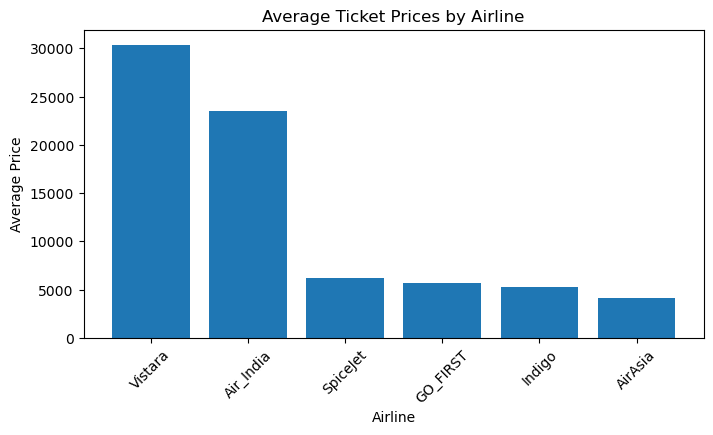

In [15]:
average_prices = df.groupby('airline')['price'].mean()
average_prices = average_prices.reset_index()
average_prices = average_prices.sort_values('price', ascending=False)

plt.figure(figsize=(8, 4))
plt.bar(average_prices['airline'], average_prices['price'])
plt.xticks(rotation=45)
plt.title('Average Ticket Prices by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.show()

In [16]:
average_prices

,airline,price
5,Vistara,30396.536302
1,Air_India,23507.019112
4,SpiceJet,6179.278881
2,GO_FIRST,5652.007595
3,Indigo,5324.216303
0,AirAsia,4091.072742


### B) How is the price affected when tickets are bought in just 1 or 2 days before departure?

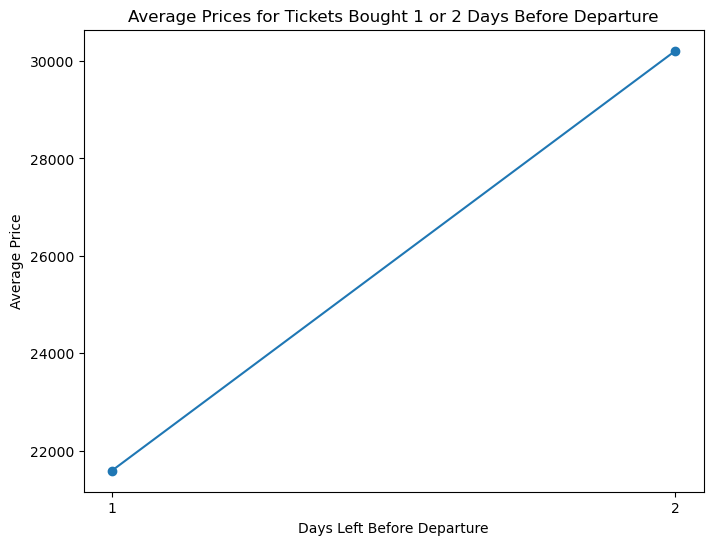

In [17]:
filtered_data = df[df['days_left'].isin([1, 2])]

average_prices = filtered_data.groupby('days_left')['price'].mean()

plt.figure(figsize=(8, 6))
average_prices.plot(kind='line', marker='o')
plt.title('Average Prices for Tickets Bought 1 or 2 Days Before Departure')
plt.xlabel('Days Left Before Departure')
plt.ylabel('Average Price')
plt.xticks([1, 2])
plt.show()

In [18]:
average_prices

days_left
1    21591.867151
2    30211.299801
Name: price, dtype: float64

### C) Does ticket price change based on the departure time and arrival time?

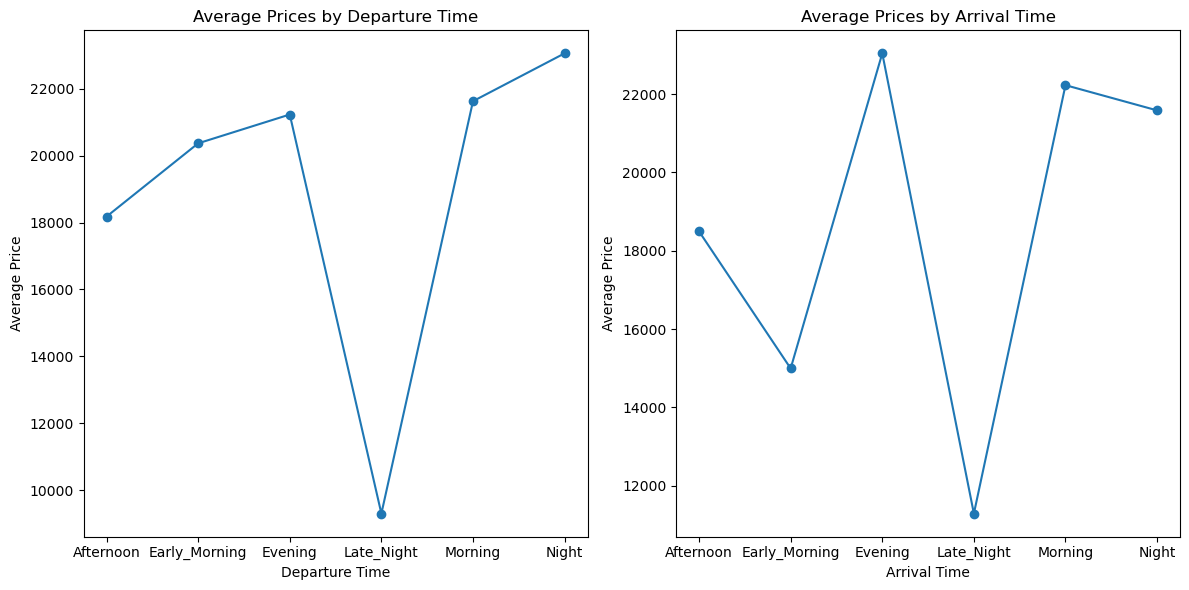

In [19]:
average_prices_departure = df.groupby('departure_time')['price'].mean()
average_prices_arrival = df.groupby('arrival_time')['price'].mean()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
average_prices_departure.plot(kind='line', marker='o')
plt.title('Average Prices by Departure Time')
plt.xlabel('Departure Time')
plt.ylabel('Average Price')

plt.subplot(1, 2, 2)
average_prices_arrival.plot(kind='line', marker='o')
plt.title('Average Prices by Arrival Time')
plt.xlabel('Arrival Time')
plt.ylabel('Average Price')

plt.tight_layout()
plt.show()

In [20]:
average_prices_departure

departure_time
Afternoon        18179.203331
Early_Morning    20370.676718
Evening          21232.361894
Late_Night        9295.299387
Morning          21630.760254
Night            23062.146808
Name: price, dtype: float64

In [21]:
average_prices_arrival

arrival_time
Afternoon        18494.598993
Early_Morning    14993.139521
Evening          23044.371615
Late_Night       11284.906078
Morning          22231.076098
Night            21586.758341
Name: price, dtype: float64

### D) How the price changes with change in Source and Destination?

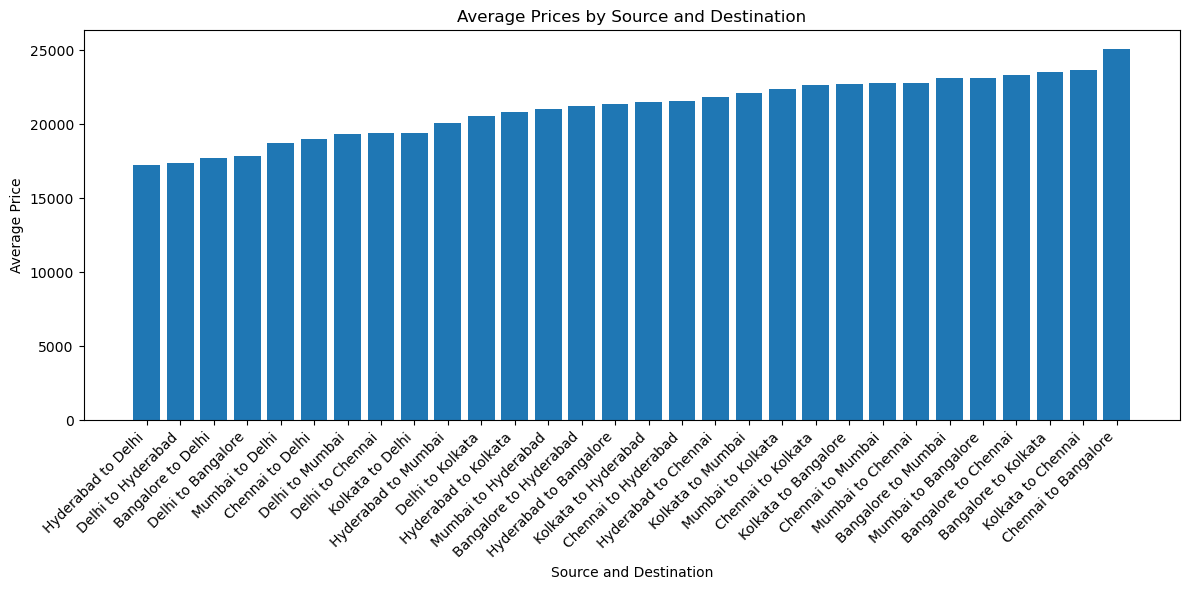

In [22]:
average_prices = df.groupby(['source_city', 'destination_city'])['price'].mean()
average_prices = average_prices.reset_index()
average_prices = average_prices.sort_values('price', ascending=True)

plt.figure(figsize=(12, 6))
plt.bar(range(len(average_prices)), average_prices['price'])
plt.xticks(range(len(average_prices)), average_prices['source_city'] + ' to ' + average_prices['destination_city'], rotation=45, ha='right')
plt.title('Average Prices by Source and Destination')
plt.xlabel('Source and Destination')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()

In [23]:
average_prices

,source_city,destination_city,price
17,Hyderabad,Delhi,17243.945685
12,Delhi,Hyderabad,17347.288379
1,Bangalore,Delhi,17723.313972
10,Delhi,Bangalore,17880.216315
27,Mumbai,Delhi,18725.320008
6,Chennai,Delhi,18981.863948
14,Delhi,Mumbai,19355.829812
11,Delhi,Chennai,19369.881354
22,Kolkata,Delhi,19422.354559
19,Hyderabad,Mumbai,20080.865759


### E) How does the ticket price vary between Economy and Business class?

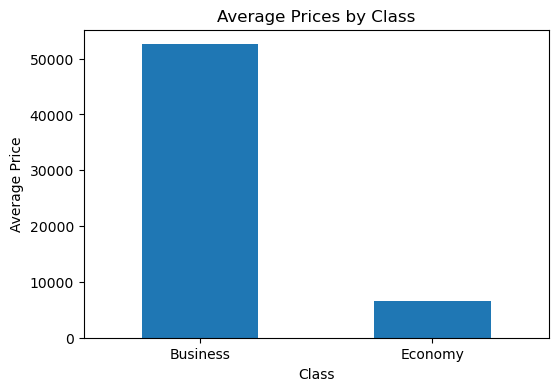

In [24]:
average_prices = df.groupby('class')['price'].mean()

plt.figure(figsize=(6, 4))
average_prices.plot(kind='bar')
plt.title('Average Prices by Class')
plt.xlabel('Class')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.show()

In [25]:
average_prices

class
Business    52540.081124
Economy      6572.342383
Name: price, dtype: float64

# Research Report:- 

### A) Does price vary with Airlines?

There is significant variation in ticket prices among different airlines, with Air India and Vistara having the highest average prices, while AirAsia and Indigo have comparatively lower average prices. This suggests that airline choice plays a crucial role in determining ticket prices for customers.

### B) How is the price affected when tickets are bought in just 1 or 2 days before departure?

Price of tickets increases significantly when they are bought just 1 or 2 days before departure. This suggests that last-minute bookings tend to be more expensive, indicating a potential price premium for the convenience of booking close to the departure date.

### C) Does ticket price change based on the departure time and arrival time?

 Ticket prices show variations based on the departure time and arrival time. Evening and night departures tend to have higher average prices, while late night departures and early morning arrivals have relatively lower average prices. This suggests that departure and arrival times can impact ticket pricing, potentially reflecting demand patterns and preferences of travelers.

### D) How the price changes with change in Source and Destination?

 Flight prices vary depending on the source and destination cities. The prices range from the lowest for the Delhi-Hyderabad route (17,243.94) to the highest for the Chennai-Bangalore route (25,081.85). This suggests that different routes may have different pricing dynamics influenced by factors such as distance, demand, and competition among airlines.

### E) How does the ticket price vary between Economy and Business class?

The average price for Business class is significantly higher than that of Economy class, indicating a notable price variation between the two classes.